In [1]:
# pip install forex-python

In [2]:
from forex_python.bitcoin import BtcConverter
b = BtcConverter()   # add "force_decimal=True" parmeter to get Decimal rates
b.get_latest_price('USD')

38591.9058

In [3]:
import datetime

In [4]:
start_date = datetime.datetime(2015,1,1)
end_date = datetime.datetime(2021,12,27)
data = b.get_previous_price_list('USD', start_date, end_date)

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(data.items(), columns=['Date', 'DateValue'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2553 non-null   object 
 1   DateValue  2553 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.0+ KB


In [8]:
df.Date = pd.to_datetime(df.Date)

In [9]:
df["year"] = df["Date"].dt.year
df

,Date,DateValue,year
0,2015-01-01,313.9247,2015
1,2015-01-02,314.5916,2015
2,2015-01-03,279.8507,2015
3,2015-01-04,263.6343,2015
4,2015-01-05,272.9486,2015
...,...,...,...
2548,2021-12-23,50832.2517,2021
2549,2021-12-24,50831.9433,2021
2550,2021-12-25,50436.6433,2021
2551,2021-12-26,50796.8750,2021


In [11]:
import matplotlib.pyplot as plt

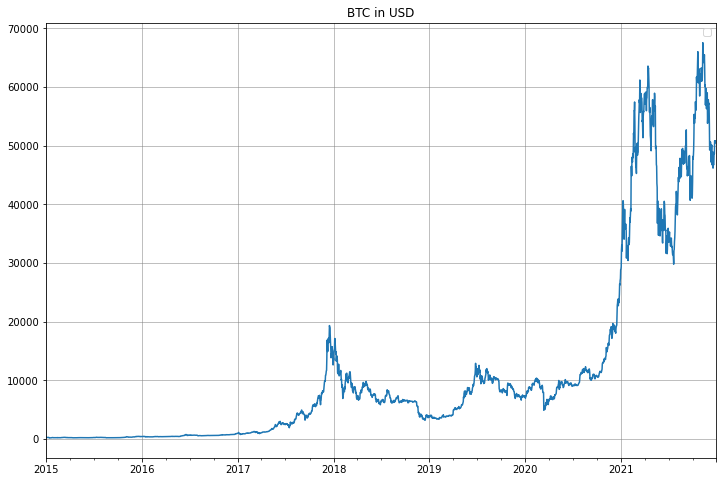

In [12]:
df.plot.line(x="Date", y="DateValue", figsize= (12,8))
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.title("BTC in USD")
plt.xlabel("")
plt.legend("")
plt.show()

In [17]:
df_2021 = df[df.year == 2021]
df_2015 = df.drop(df[df.year==2021].index)

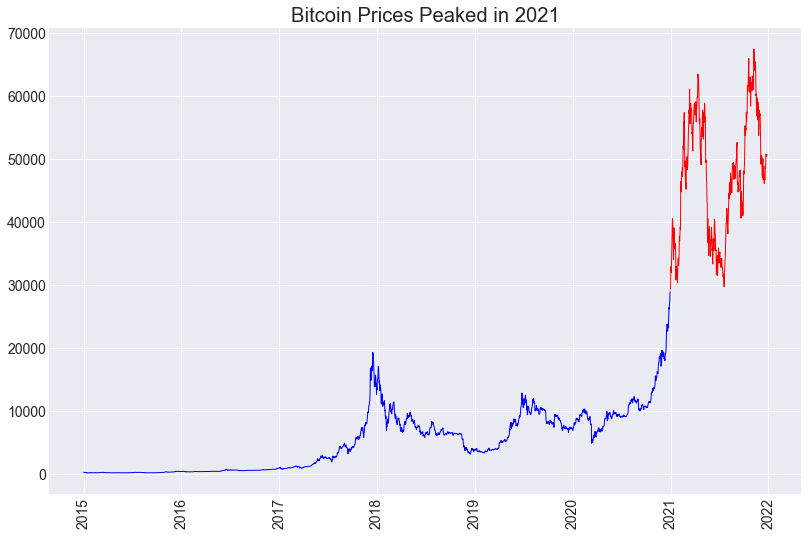

In [24]:
import matplotlib.style as style
style.use('seaborn-darkgrid')

### Adding the plot
fig,ax = plt.subplots(figsize=(12,8))

ax.plot(df_2021['Date'],
        df_2021['DateValue'],
        linewidth=1, color='red')

### Highlighting the 2007-2008 period
ax.plot(df_2015['Date'],
        df_2015['DateValue'],
        linewidth=1, color='blue')

plt.title("Bitcoin Prices Peaked in 2021")

plt.xticks(rotation = 90)

plt.show()

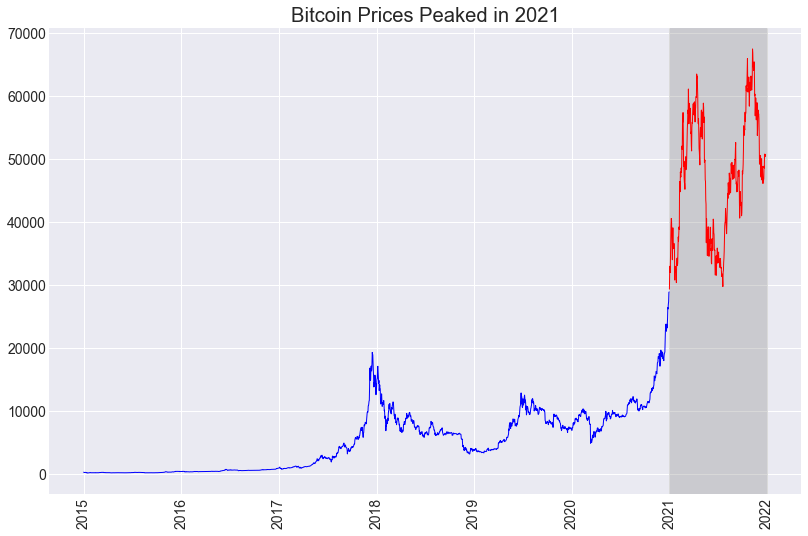

In [35]:
import matplotlib.style as style
style.use('seaborn-darkgrid')

### Adding the plot
fig,ax = plt.subplots(figsize=(12,8))

ax.plot(df_2021['Date'],
        df_2021['DateValue'],
        linewidth=1, color='red')

### Highlighting the 2007-2008 period
ax.plot(df_2015['Date'],
        df_2015['DateValue'],
        linewidth=1, color='blue')

ax.axvspan(xmin="2021", xmax="2022", ymin=0,
           alpha=0.3, color='grey')

plt.title("Bitcoin Prices Peaked in 2021")

plt.xticks(rotation = 90)

plt.show()